In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 와인 데이터 분석하기
## 와인의 품질에 따른 좋은 와인 구별하기

In [2]:
wine = pd.read_csv("./data/winequality-white.csv", sep = ";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


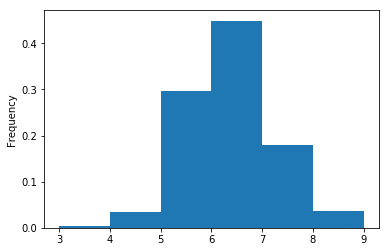

In [3]:
wine["quality"].plot.hist(bins = 6, density = True)
plt.show()

# 품질 기준에 따라 좋은 와인 데이터와 나쁜 와인 데이터를 구별함

In [4]:
good_wine = wine[wine["quality"] >= 8]
bad_wine = wine[wine["quality"] <= 4]
good_wine.shape, bad_wine.shape

((180, 12), (183, 12))

## 타르타르산에 따른 좋은 와인과 나쁜와인의 구별

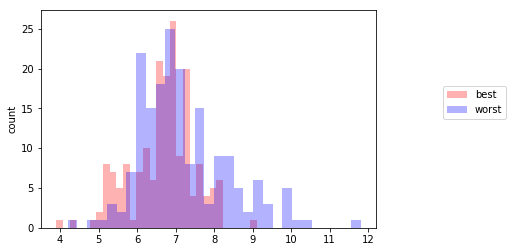

In [5]:
good_wine["fixed acidity"].plot.hist(color = "r", alpha = 0.3, bins = 30, label = "best")
bad_wine["fixed acidity"].plot.hist(color = "b", alpha = 0.3, bins = 30, label = "worst")
plt.ylabel("count")
plt.legend(loc = (1.2, 0.5))
plt.show()

## 아세트산에 따른 좋은 와인 분류

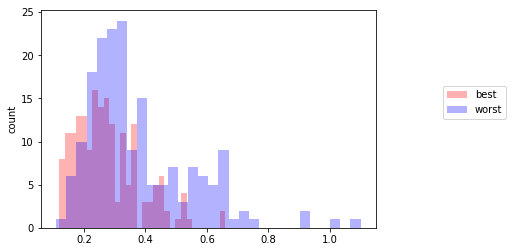

In [6]:
good_wine["volatile acidity"].plot.hist(color = "r", alpha = 0.3, bins = 30, label = "best")
bad_wine["volatile acidity"].plot.hist(color = "b", alpha = 0.3, bins = 30, label = "worst")
plt.ylabel("count")
plt.legend(loc = (1.2, 0.5))
plt.show()

## 설탕 잔여량에 따른 좋은 와인 구분

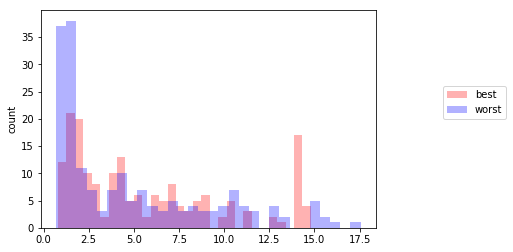

In [7]:
good_wine["residual sugar"].plot.hist(color = "r", alpha = 0.3, bins = 30, label = "best")
bad_wine["residual sugar"].plot.hist(color = "b", alpha = 0.3, bins = 30, label = "worst")
plt.ylabel("count")
plt.legend(loc = (1.2, 0.5))
plt.show()

## 알코올 함량에 따른 좋은와인과 나쁜와인 구별

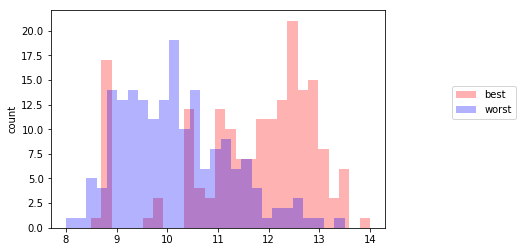

In [8]:
good_wine["alcohol"].plot.hist(color = "r", alpha = 0.3, bins = 27, label = "best")
bad_wine["alcohol"].plot.hist(color = "b", alpha = 0.3, bins = 27, label = "worst")
plt.ylabel("count")
plt.legend(loc = (1.2, 0.5))
plt.show()

## 구연산에 따른 좋은 와인과 나쁜 와인의 구별

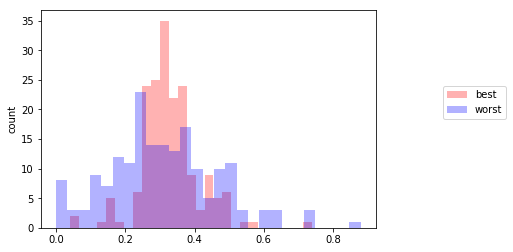

In [9]:
good_wine["citric acid"].plot.hist(color = "r", alpha = 0.3, bins = 27, label = "best")
bad_wine["citric acid"].plot.hist(color = "b", alpha = 0.3, bins = 27, label = "worst")
plt.ylabel("count")
plt.legend(loc = (1.2, 0.5))
plt.show()

## 단순히 평균값의 차이를 통해 어떤 모델을 사용할지 구별

In [10]:
pd.concat([good_wine.mean(axis = 0), bad_wine.mean(axis = 0), (good_wine.mean(axis = 0) - bad_wine.mean(axis = 0))], axis = 1, keys = ["best", "worst", "mean_diff"])

,best,worst,mean_diff
fixed acidity,6.678333,7.180874,-0.502541
volatile acidity,0.277972,0.375984,-0.098011
citric acid,0.328167,0.307705,0.020462
residual sugar,5.628333,4.821038,0.807295
chlorides,0.038011,0.050557,-0.012546
free sulfur dioxide,36.627778,26.633880,9.993898
total sulfur dioxide,125.883333,130.232240,-4.348907
density,0.992214,0.994343,-0.002129
pH,3.221167,3.183388,0.037779
sulphates,0.485667,0.475956,0.009710


## 딱히 큰 차이점이 보이지 않아 여러변수들을 고려해서 예측 모델을 만들어보기로함

# 로지스틱 회귀분석 모델

In [11]:
total_wine = pd.concat([good_wine, bad_wine], axis = 0)

In [12]:
X_data = total_wine.drop("quality", axis = 1)
X_data = X_data.values
X_data

array([[ 6.2  ,  0.66 ,  0.48 , ...,  3.33 ,  0.39 , 12.8  ],
       [ 6.2  ,  0.66 ,  0.48 , ...,  3.33 ,  0.39 , 12.8  ],
       [ 6.8  ,  0.26 ,  0.42 , ...,  3.47 ,  0.48 , 10.5  ],
       ...,
       [ 6.   ,  0.35 ,  0.46 , ...,  3.24 ,  0.35 , 12.1  ],
       [ 5.2  ,  0.405,  0.15 , ...,  3.52 ,  0.4  , 11.6  ],
       [ 6.2  ,  0.53 ,  0.02 , ...,  3.24 ,  0.35 ,  9.5  ]])

In [13]:
y_data = total_wine["quality"]
y_data = np.array([1 if quality >=8 else 0 for quality in y_data])
y_data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [15]:
train_X, test_X, train_y, test_y = train_test_split(X_data, y_data, test_size = 0.2)

In [16]:
log_reg = LogisticRegression()
log_reg.fit(train_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
y_pred = log_reg.predict(test_X)

In [18]:
log_reg.score(train_X, train_y)

0.8344827586206897

In [19]:
accuracy_score(test_y, y_pred)

0.7945205479452054

# 로지스틱 회귀 모형 정확도가 대략 76% 정도됨

In [20]:
from sklearn.metrics import classification_report
y_true, y_pred = test_y, log_reg.predict(test_X)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        37
           1       0.82      0.75      0.78        36

   micro avg       0.79      0.79      0.79        73
   macro avg       0.80      0.79      0.79        73
weighted avg       0.80      0.79      0.79        73



# 선형 회귀 모형으로 예측 한 결과

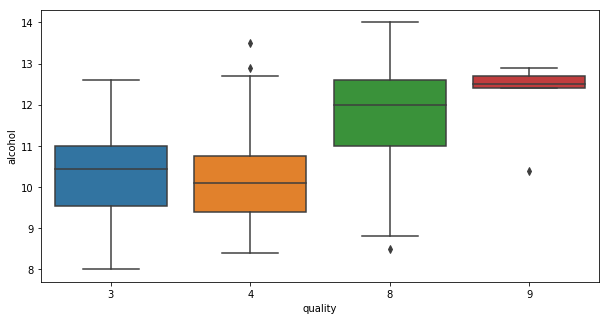

In [21]:
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(x = total_wine["quality"], y = total_wine["alcohol"])
plt.show()

## seaborn으로 시각화한 결과 품질에 따라 알코올 함량의 수를 파악할 수 있었음

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
x = total_wine["quality"].values
y = total_wine["alcohol"].values
x.shape, y.shape

((363,), (363,))

In [24]:
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.33)

In [25]:
lr = LinearRegression()
lr.fit(train_X.reshape(-1, 1), train_y.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
y_pred = lr.predict(test_X.reshape(-1, 1))

In [27]:
from sklearn.metrics import r2_score
r2_score(test_y, y_pred)

0.3050285573956213

# 로지스틱 회귀분석과 비교했을때 결과값이 너무 안좋음
## 따라서 여러 변수들을 결과값에 사용했을때의 모델이 더 정확한 측정값을 나타냄

# 다음은 전처리 과정을 거쳐서 텐서플로우로 로지스틱 회귀를 구현했다. 그랬더니 성능이 더 좋아진것을 알수 있었다.

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
std = StandardScaler()

In [30]:
std.fit(X_data)
X_scaled = std.transform(X_data)

In [36]:
y_scaled = y_data.reshape(-1, 1)

In [32]:
import tensorflow as tf

In [37]:
X_scaled.shape, y_scaled.shape

((363, 11), (363, 1))

In [38]:
X = tf.placeholder(tf.float32, shape = [None, 11])
Y = tf.placeholder(tf.float32, shape = [None, 1])

In [48]:
W = tf.Variable(tf.random_normal([11, 1], name = "weight"))
b = tf.Variable(tf.random_normal([1], name = "bias"))

Instructions for updating:
Colocations handled automatically by placer.


In [49]:
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [50]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

In [51]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)

In [52]:
train = optimizer.minimize(cost)

In [53]:
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

In [54]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    feed = {X : X_scaled, Y : y_scaled}
    
    for step in range(2001):
        sess.run(train, feed_dict = feed)
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict = feed))
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict = feed)
    print("\nHypotheis: \n", h, "\nCorrect (Y): \n", c, "\nAccuracy: ", a)

0 1.6797287
200 0.5274179
400 0.40115774
600 0.3698425
800 0.36067003
1000 0.35729048
1200 0.3556657
1400 0.35468817
1600 0.3540039
1800 0.35347638
2000 0.35304272

Hypotheis: 
 [[2.37091303e-01]
 [2.37091303e-01]
 [4.23241228e-01]
 [5.44414103e-01]
 [5.44414103e-01]
 [6.76106215e-01]
 [6.76106215e-01]
 [5.77656209e-01]
 [9.50177610e-02]
 [9.28004622e-01]
 [9.29407418e-01]
 [8.75106215e-01]
 [9.50803757e-01]
 [9.76653099e-01]
 [9.63388562e-01]
 [9.85980511e-01]
 [8.89846444e-01]
 [8.17495286e-01]
 [9.80027914e-01]
 [9.95405078e-01]
 [7.84152746e-01]
 [5.84618270e-01]
 [5.58902085e-01]
 [5.58902085e-01]
 [7.66345382e-01]
 [8.55702758e-01]
 [9.04428244e-01]
 [9.41611767e-01]
 [7.79198587e-01]
 [7.39355087e-01]
 [7.39355087e-01]
 [7.39355087e-01]
 [6.25823200e-01]
 [6.25823200e-01]
 [2.72369385e-01]
 [3.09870332e-01]
 [9.54425097e-01]
 [9.50813055e-01]
 [3.38920951e-02]
 [8.64055216e-01]
 [4.25966263e-01]
 [8.96224380e-01]
 [8.15766692e-01]
 [4.98504668e-01]
 [7.70879030e-01]
 [8.15766692

# 82%의 정확도를 가지고 학습하였다.